<a href="https://colab.research.google.com/github/Aiswaryabinu/iris/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [24]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
df.isnull().values.any()

np.False_

In [27]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


<Axes: xlabel='count', ylabel='Species'>

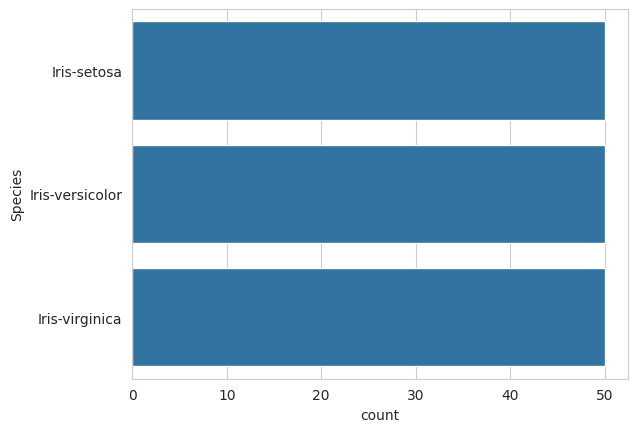

In [31]:
sns.countplot(df['Species'])


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

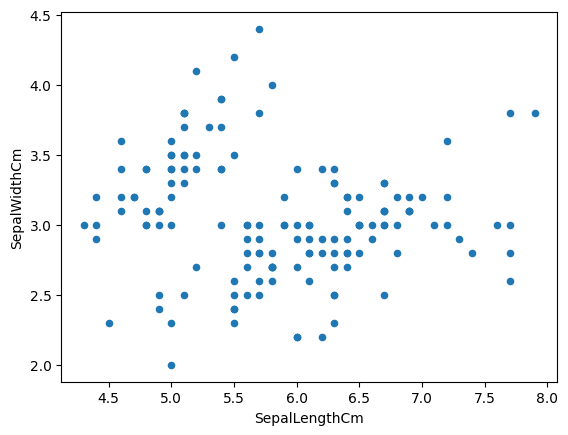

In [29]:
df.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')

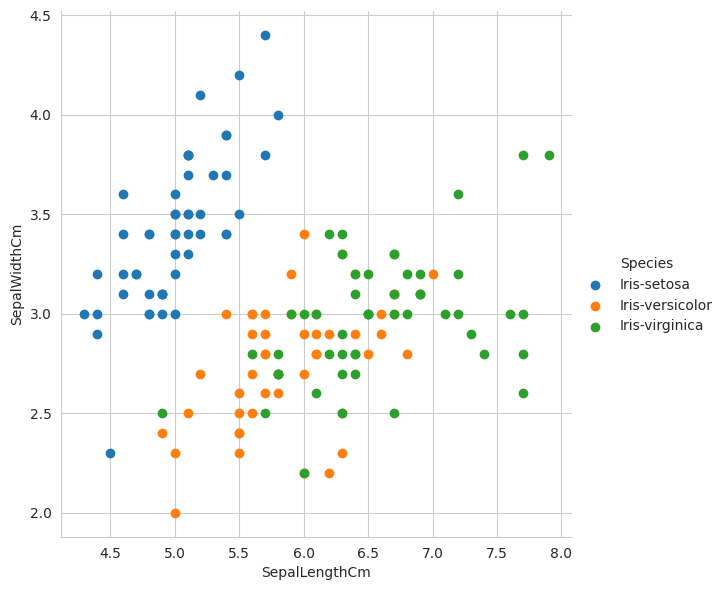

In [30]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species',height=6).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

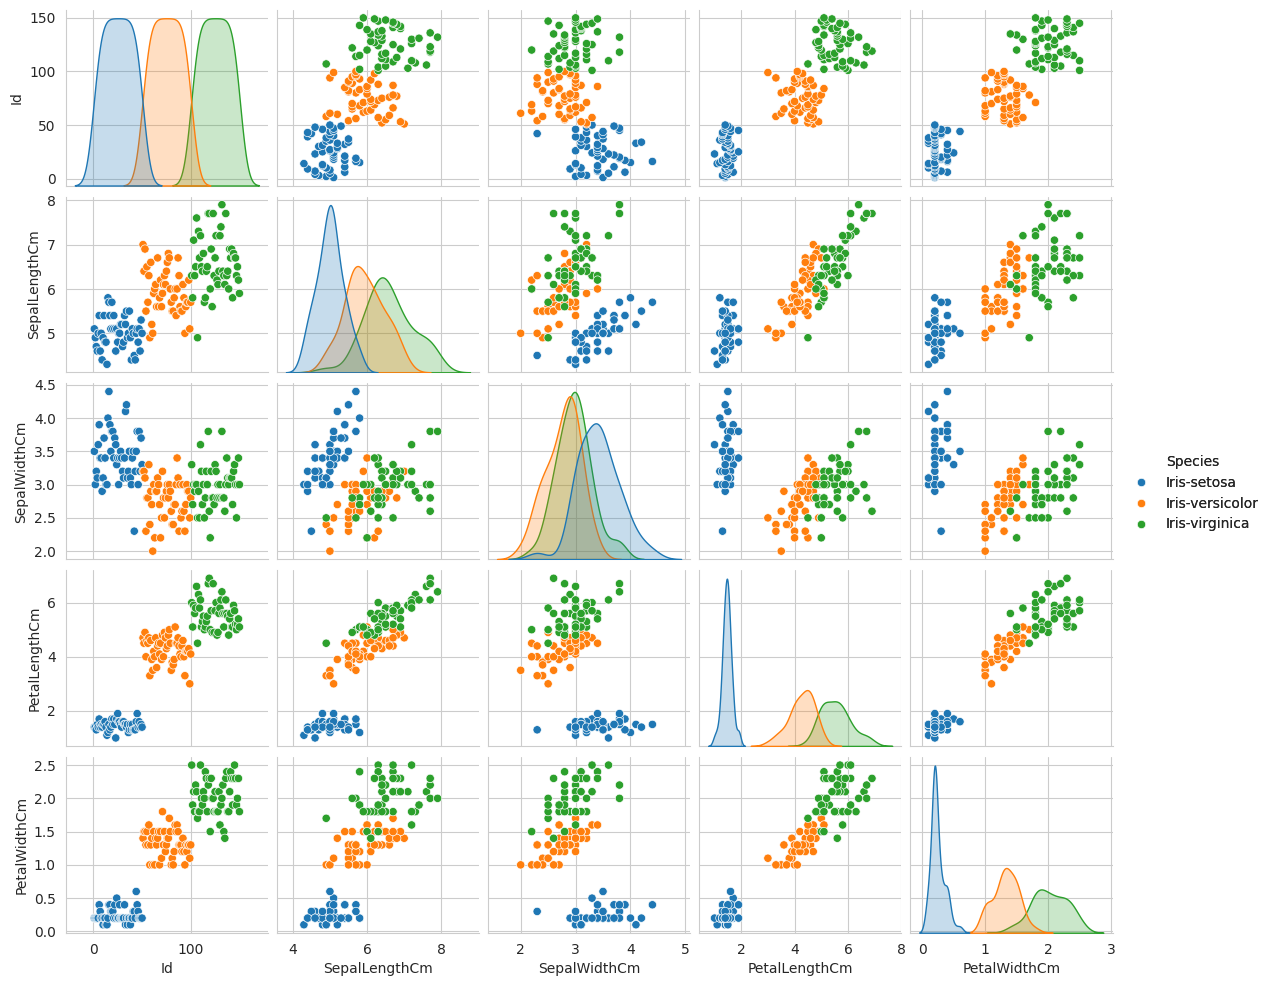

In [32]:
sns.pairplot(df,hue='Species',size=2).add_legend()

In [34]:
for column in df.columns:
  if df[column].dtype==np.number:
    continue
df[column]=LabelEncoder().fit_transform(df[column])


In [35]:
df.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,int64


In [36]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [38]:
x=df.drop(['Species'],axis=1)
y=df['Species']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [43]:
sd=StandardScaler()
x_train_scaled=sd.fit_transform(x_train)
x_test_scaled=sd.transform(x_test)

In [74]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
k_range=range(1,20)
scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k).fit(x_train_scaled,y_train)
  scores.append(knn.score(x_test_scaled,y_test))
  knn.fit(x_train_scaled,y_train)

Accuracy: 0.96


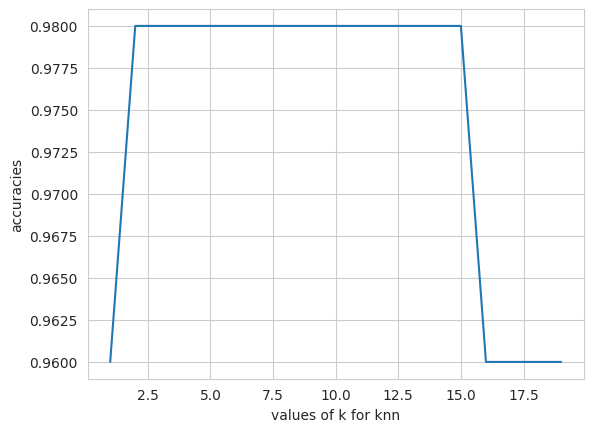

In [86]:


plt.plot(k_range,scores)
plt.xlabel('values of k for knn')
plt.ylabel('accuracies')

# Calculate accuracy
y_pred = knn.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


In [76]:
y_pred = knn.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.96


In [ ]:
cf=confusion_matrix(y_test,y_pred)


In [79]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [0, 1, 2])

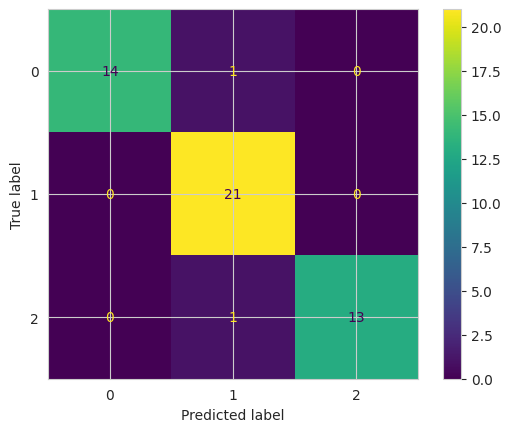

In [81]:
cm_display.plot()
plt.show()

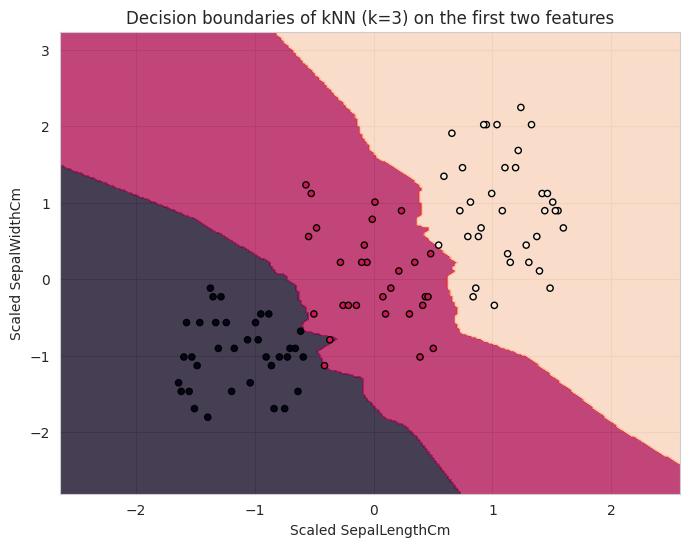

In [88]:

x_reduced = x_train_scaled[:, :2]
y_train_vis = y_train

knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(x_reduced, y_train_vis)

# Create a meshgrid
h = .02
x_min, x_max = x_reduced[:, 0].min() - 1, x_reduced[:, 0].max() + 1
y_min, y_max = x_reduced[:, 1].min() - 1, x_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot also the training points
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y_train_vis, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision boundaries of kNN (k=3) on the first two features")
plt.xlabel("Scaled SepalLengthCm")
plt.ylabel("Scaled SepalWidthCm")
plt.show()
